In [1]:
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# 使用 `Pandas.DataFrame.corr` 计算相关系数矩阵 

使用 [`pandas.DataFrame.corr`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) 方法计算相关系数矩阵。

In [3]:
correlation_matrix = data.corr(numeric_only=True)

In [4]:
correlation_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


# 使用 `seaborn.heatmap` 可视化相关系数矩阵

<Axes: >

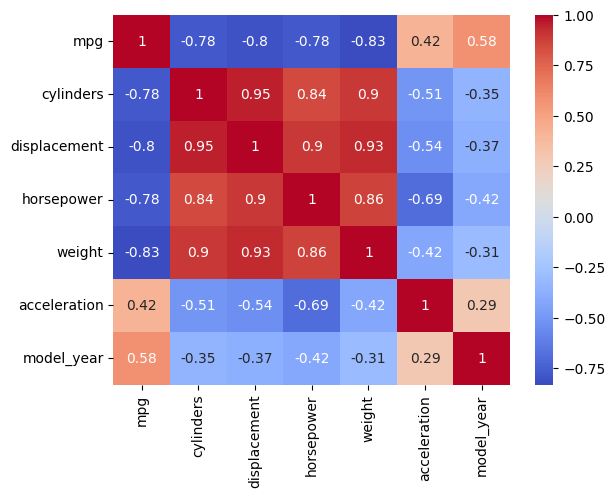

In [5]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# 使用 `seaborn.pairplot` 可视化变量相关性

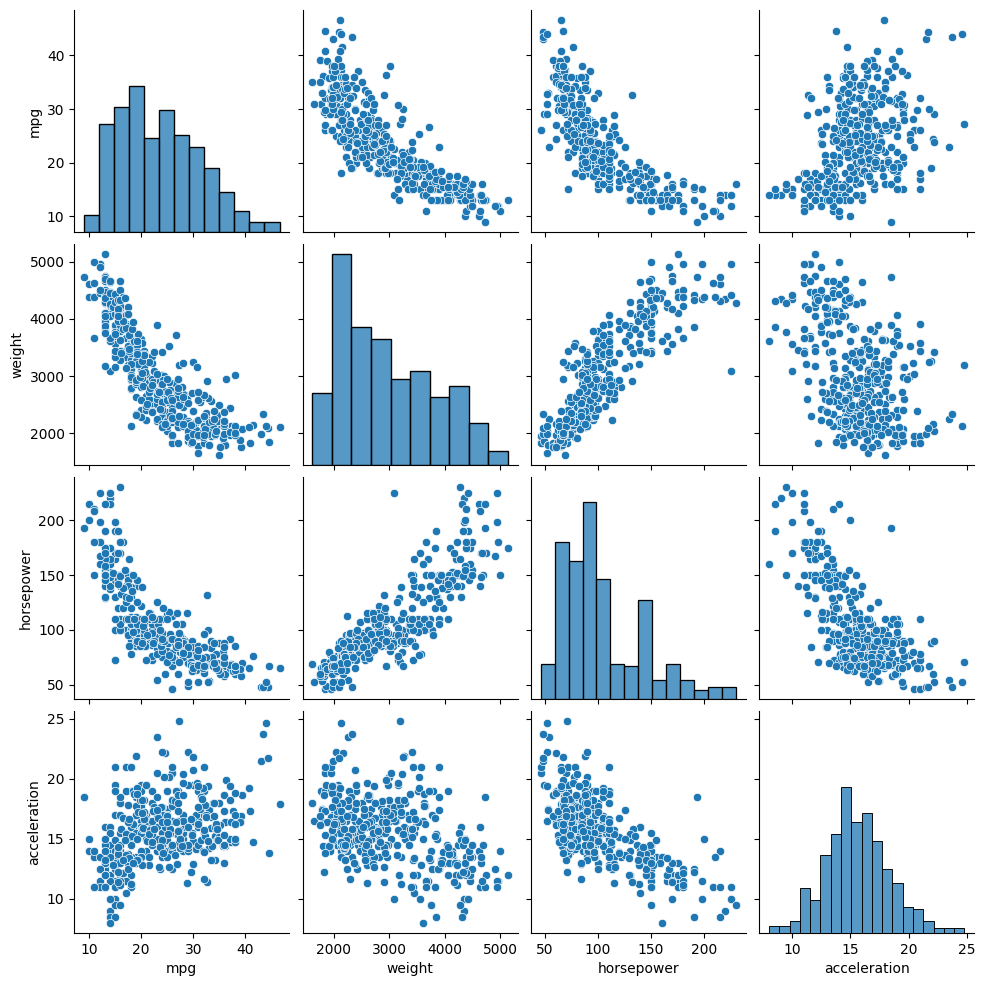

In [16]:
sns.pairplot(
    data[
        [
            "mpg",
            "weight",
            "horsepower",
            "acceleration",
        ]
    ]
)

# 使用自定义函数同时返回相关系数和显著性检验结果

In [6]:
def corr_p(df):
    """Generates a tuple containing the correlation coefficients matrix and p-values matrix.

    Args:
        df (dataframe): input dataframe, each column as a feature, each row as an observation

    Returns:
        res: tuple with correlation coefficients matrix and p_values matrix
    """

    corr_matrix = df.corr(numeric_only=True)

    p_value_matrix = df.corr(numeric_only=True, method=lambda x, y: pearsonr(x, y)[1])

    res = (corr_matrix, p_value_matrix)

    return res

In [7]:
data_trunc = data[
    [
        "mpg",
        "weight",
        "horsepower",
        "acceleration",
    ]
]

In [8]:
corr_p(data_trunc)

(                   mpg    weight  horsepower  acceleration
 mpg           1.000000 -0.831741   -0.778427      0.420289
 weight       -0.831741  1.000000    0.864538     -0.417457
 horsepower   -0.778427  0.864538    1.000000     -0.689196
 acceleration  0.420289 -0.417457   -0.689196      1.000000,
                         mpg         weight     horsepower  acceleration
 mpg            1.000000e+00  2.972800e-103   7.031989e-81  1.823092e-18
 weight        2.972800e-103   1.000000e+00  1.364347e-118  3.243794e-18
 horsepower     7.031989e-81  1.364347e-118   1.000000e+00  1.581886e-56
 acceleration   1.823092e-18   3.243794e-18   1.581886e-56  1.000000e+00)